# Import Packages, Functions and Data

In [1]:
import titanlib
import geopandas
import pandas as pd
import netCDF4
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import time



# Import custom version of titanlib containing changes
import titanlibcustom



# Import Formatted Data and functions from other Python script
from Data_Importation_and_Function_Definition import ROI_counties, NI_counties, rain_wow, rain_wow_hourly_obs, temp_wow, rain_official, temp_official, isolate_data_of_interest, plot_wow_data



# Import Custom Checks
from Custom_Checks import custom_range_check_climatology, plot_beta_vs_population_flagged, gdf_clim_norm_temp_mean, gdf_clim_norm_temp_TN, gdf_clim_norm_temp_TX, gdf_clim_norm_rain_mean

%matplotlib inline

Note: As advised, the Official Rainfall Rate column is currently beign set as equal to the 
Rainfall Accumulation Hourly column


# Obtain Test Data

In [2]:
gdf_temp_wow, gdf_temp_official, gdf_temp_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="10",
                                                                              type_of_data="Temperature", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Air Temperature"])

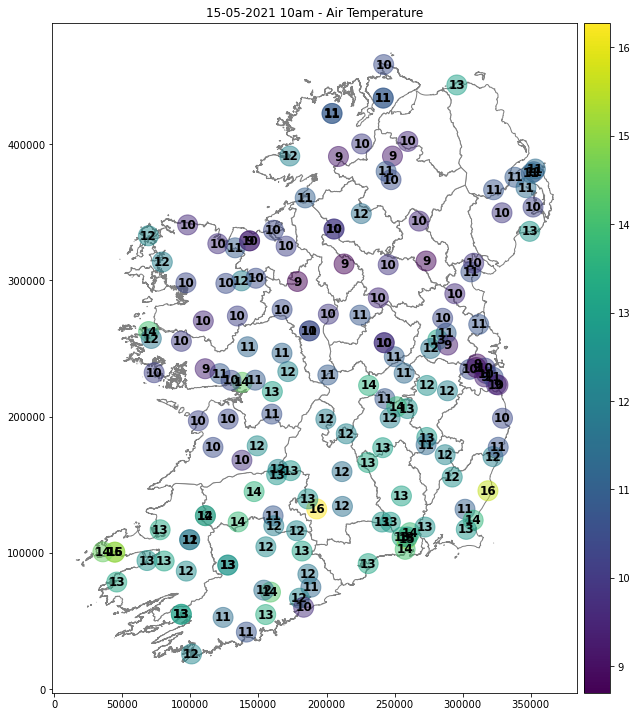

In [3]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = None)

In [4]:
# By default let's discard any missing data from Rainfall Accumulation, Rainfall Accumulation Hourly
# or Rainfall Rate.

# Note if we were only interested in one of these values we could maximise our data points by only
# removing missing values from the column of interest
gdf_rain_wow, gdf_rain_official, gdf_rain_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="23",
                                                                              type_of_data="Rainfall", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Rainfall Accumulation", 
                                                                                                          "Rainfall Accumulation Hourly", 
                                                                                                          "Rainfall Rate"])

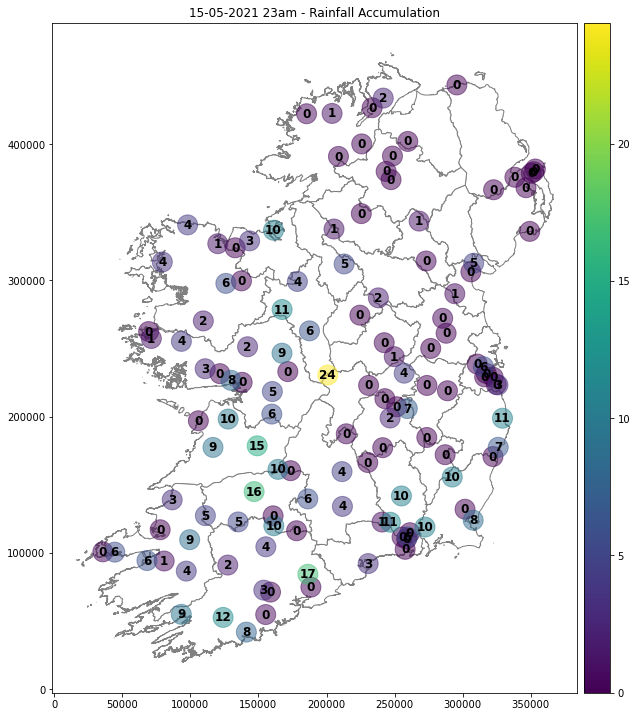

In [5]:
plot_wow_data(gdf_of_interest = gdf_rain_combined, type_of_plot = "Rainfall Accumulation", 
              buffer_val = 0, flags = None)

## range_check_climatology

In [6]:
long_np = np.array(gdf_temp_combined["Longitude"])
lat_np = np.array(gdf_temp_combined["Latitude"])

points = titanlib.Points(lat_np, long_np) # Location of each station observation

np_values = np.array(gdf_temp_combined["Air Temperature"]) # Values you want to check Rainfall/Temp


dt = datetime.datetime(year = 2021, month = 5, day = 15, hour = 10)
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format


# We have the choice between defining a global neg and pos
# Or defining individual min and max values for each station

pos_above_mean = np.array([2.5]) # Value above the mean climatological value to accept
neg_below_mean = np.array([-2.5]) # Value above the mean climatological value to accept

In [7]:
# Note the code for titanlibcustom has been adjusted to return the mean temperature rather than the flag
custom_points = titanlibcustom.Points(lat_np, long_np)


dt = datetime.datetime(year = 2021, month = 5, day = 15, hour = 10)
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format

custom_flags = titanlibcustom.range_check_climatology(custom_points, np_values,  date_time_of_int, 
                                                      pos_above_mean, neg_below_mean)
print("Mean temperature value for each station position for this time of year\n")
print(custom_flags)


dt = datetime.datetime(year = 2021, month = 12, day = 15, hour = 10) # What if it was Winter instead?
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format

custom_flags_winter = titanlibcustom.range_check_climatology(custom_points, np_values,  date_time_of_int,
                                                             pos_above_mean, neg_below_mean)
print("\n\nMean temperature value for each station position for some time in the winter\n")
print(custom_flags_winter)

Mean temperature value for each station position for this time of year

[12 12 11 12 11 12 13 12 12 11 12 12 11 12 12 11 12 12 11 12 11 12 11 11
 11 12 11 11 11 12 12 12 12 12 12 12 12 12 12 12 11 11 11 12 13 12 12 12
 12 12 12 12 12 12 12 12 12 12 11 13 12 12 12 12 12 12 11 12 12 11 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 13 12 12 12 13 12
 12 12 12 12 12 12 12 12 11 12 12 12 12 12 12 12 12 12 11 12 12 12 12 12
 11 12 12 13 12 13 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 12 12
 12 11 11 11 11 12 12 12 12 13 12 12 12 12 12 12 12 12 11 11 11 11]


Mean temperature value for each station position for some time in the winter

[ 0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1  1
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1  1
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  

In [8]:
test_gdf = gdf_temp_combined.copy()

test_gdf["Mean Temp"] = custom_flags
test_gdf["Winter Mean Temp"] = custom_flags_winter

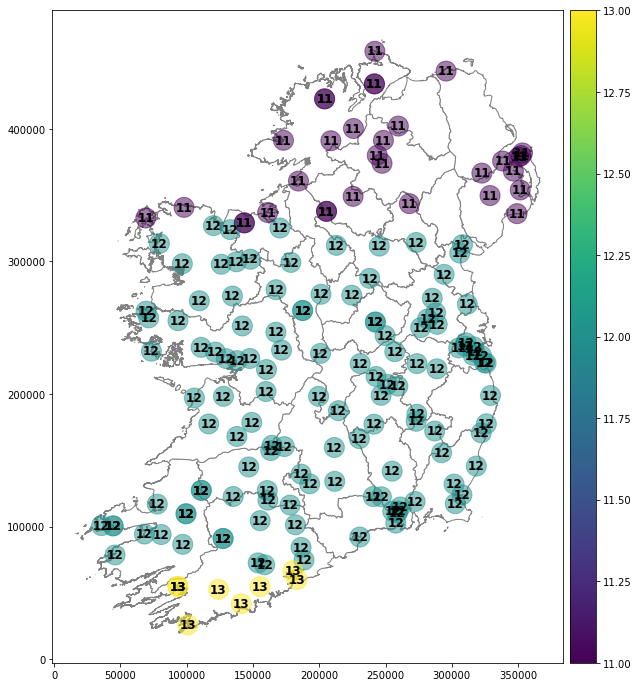

In [9]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
test_gdf.plot("Mean Temp", ax=ax, legend = True, cax=cax, markersize=400, alpha = 0.5)

# Annotate each marker with the Rainfall Accumulation to the nearest whole number
for x, y, label in zip(test_gdf.geometry.x, test_gdf.geometry.y, test_gdf["Mean Temp"]):
    ax.annotate(round(label), xy=(x, y), verticalalignment='center', horizontalalignment='center', 
                weight = "bold", fontsize = "large")

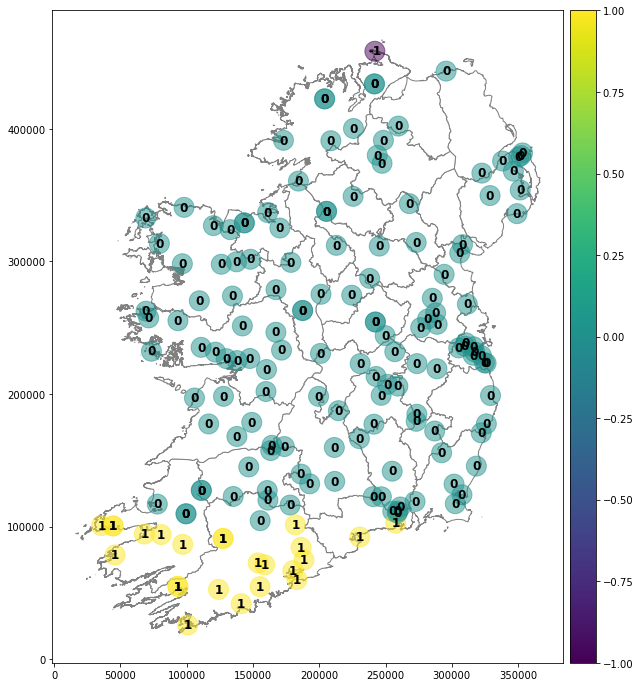

In [10]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
test_gdf.plot("Winter Mean Temp", ax=ax, legend = True, cax=cax, markersize=400, alpha = 0.5)

# Annotate each marker with the Rainfall Accumulation to the nearest whole number
for x, y, label in zip(test_gdf.geometry.x, test_gdf.geometry.y, test_gdf["Winter Mean Temp"]):
    ax.annotate(round(label), xy=(x, y), verticalalignment='center', horizontalalignment='center', 
                weight = "bold", fontsize = "large")

## Plotting Mean Temperature Ranges for December

<AxesSubplot:>

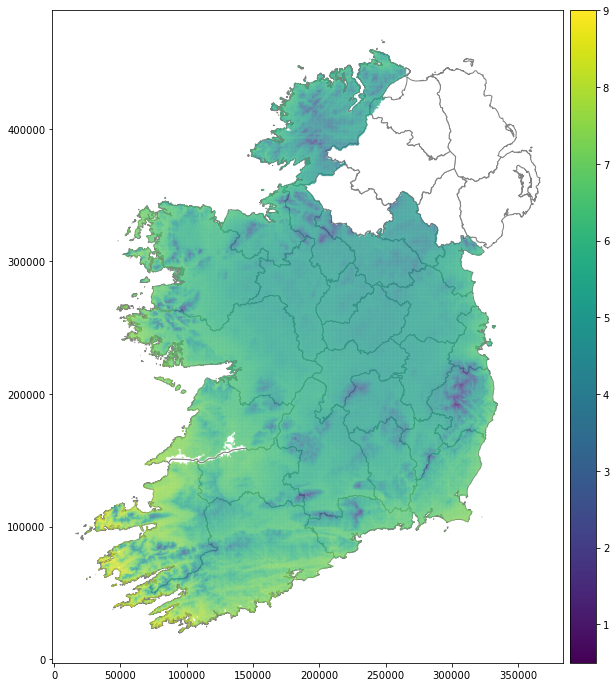

In [11]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
gdf_clim_norm_temp_mean.plot("Tm_m12", ax=ax, legend = True, cax=cax, markersize=1, alpha = 0.5)

<AxesSubplot:>

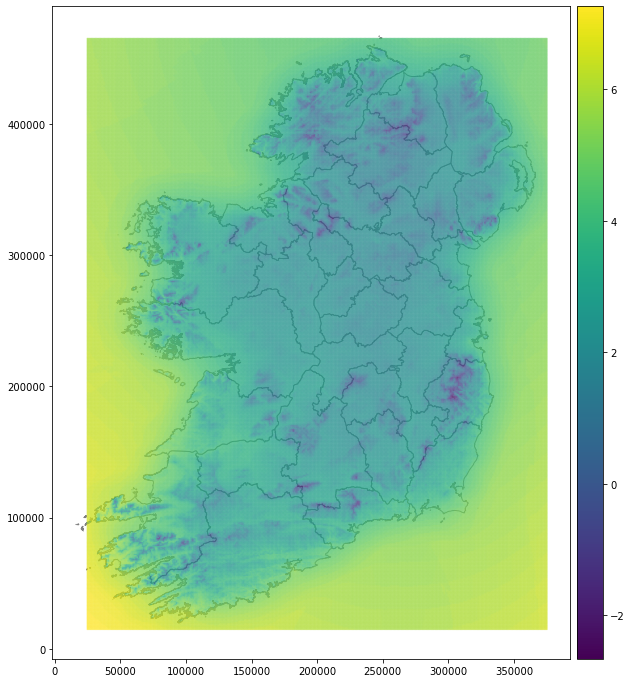

In [12]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
gdf_clim_norm_temp_TN.plot("Tn_m12", ax=ax, legend = True, cax=cax, markersize=1, alpha = 0.5)

<AxesSubplot:>

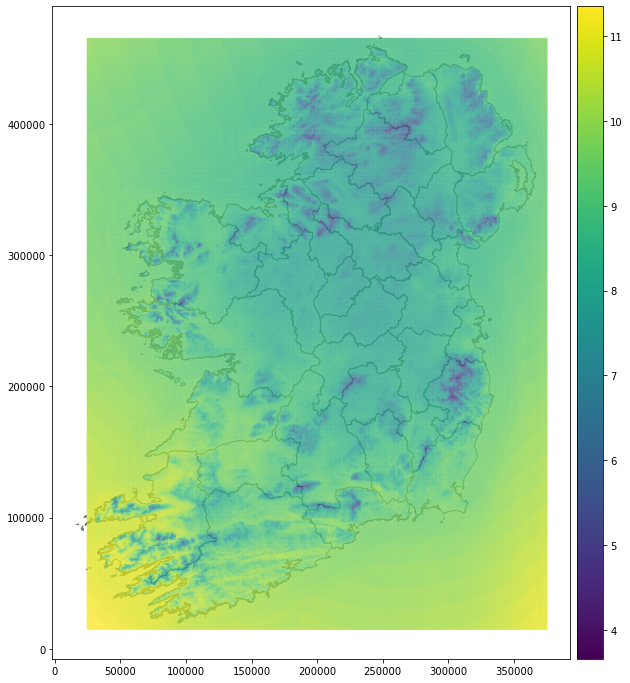

In [13]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
gdf_clim_norm_temp_TX.plot("Tx_m12", ax=ax, legend = True, cax=cax, markersize=1, alpha = 0.5)

## Plotting Mean Rainfall Ranges for December

<AxesSubplot:>

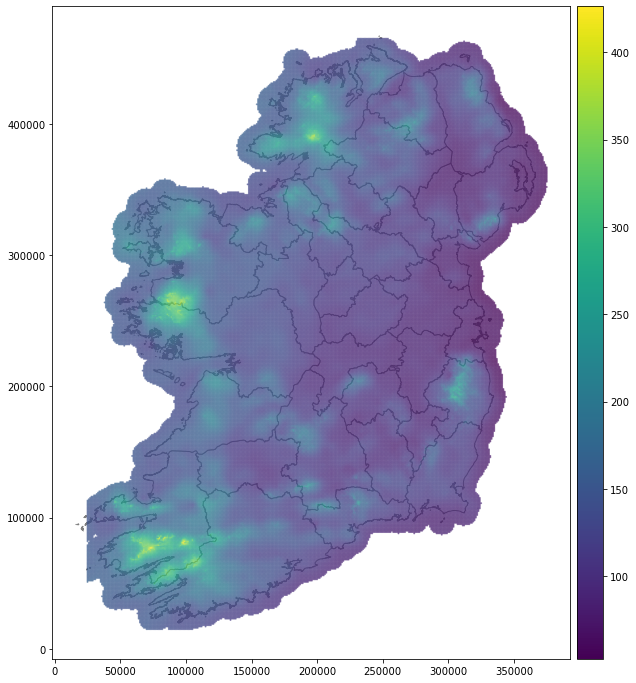

In [14]:
ax = ROI_counties["geometry"].plot(figsize=(10,12), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
gdf_clim_norm_rain_mean.plot("m12", ax=ax, legend = True, cax=cax, markersize=1, alpha = 0.5)

# Perform Custom Range Check Climatology

In [15]:
test_gdf = gdf_temp_combined.copy()

flags = custom_range_check_climatology(test_gdf, beta = 0.8)
flags

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
test_gdf["flags"] = flags

columns_of_interest = ['Longitude', 'Latitude', 'Report Date / Time',
                       'Air Temperature', 'geometry','t2dry', 'Altitude',
                       'Mean Monthly Min Temp', 'Mean Monthly Max Temp', 'Mean Monthly Temp',
                       'Adjusted Lower Limit (beta =0.8)', 'Adjusted Upper Limit (beta =0.8)',
                       'flags']

test_gdf.loc[test_gdf["flags"] == 1, columns_of_interest]

,Longitude,Latitude,Report Date / Time,Air Temperature,geometry,t2dry,Altitude,Mean Monthly Min Temp,Mean Monthly Max Temp,Mean Monthly Temp,Adjusted Lower Limit (beta =0.8),Adjusted Upper Limit (beta =0.8),flags
7,-10.271800,52.135000,2021-05-15 10:30:00,15.500000,POINT (44501.377 100504.301),NaN,11.0,8.33,15.69,12.0,9.064,14.952,1
17,-6.253800,52.549100,2021-05-15 10:43:55,15.611111,POINT (318501.696 145583.994),NaN,13.0,7.80,15.72,11.8,8.600,14.936,1
65,-8.107065,52.441959,2021-05-15 10:57:10,16.277778,POINT (192768.990 132232.871),NaN,162.0,6.73,16.18,11.5,7.684,15.244,1


In [17]:
test_rain_gdf = gdf_rain_combined.copy()

flags = custom_range_check_climatology(test_rain_gdf, beta = 0.25, type_of_check="Rainfall")
flags

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
test_rain_gdf["flags"] = flags

columns_of_interest = ['Longitude', 'Latitude', 'Report Date / Time', 'Rainfall Accumulation', 'Rainfall Rate',
       'Rainfall Accumulation Hourly', 'geometry', 'totalpluvioaccrt_nrt', 'pluviohourrain', 'Altitude',
       'Mean Monthly Rainfall', 'Adjusted Monthly Rainfall (beta =0.25)',
       'flags']

test_rain_gdf.loc[test_rain_gdf["flags"] == 1, columns_of_interest]

,Longitude,Latitude,Report Date / Time,Rainfall Accumulation,Rainfall Rate,Rainfall Accumulation Hourly,geometry,totalpluvioaccrt_nrt,pluviohourrain,Altitude,Mean Monthly Rainfall,Adjusted Monthly Rainfall (beta =0.25),flags
96,-8.78500,52.55389,NaN,16.4,0.0,0.0,POINT (146803.792 144972.549),0.0,0.0,12.0,65.0,16.25,1
132,-7.98667,53.32611,NaN,24.4,0.0,0.0,POINT (200937.325 230622.979),0.0,0.0,42.0,61.0,15.25,1


# Plot the % Population Flagged vs Beta

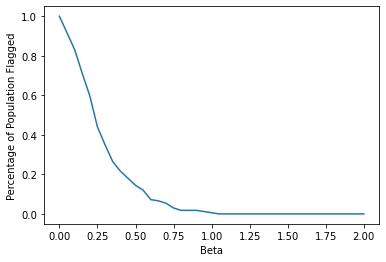

In [19]:
test_gdf = gdf_temp_combined.copy()

plot_beta_vs_population_flagged(test_gdf, min_beta = 0, max_beta = 2, step_beta = 0.05, type_of_data = "Temperature")

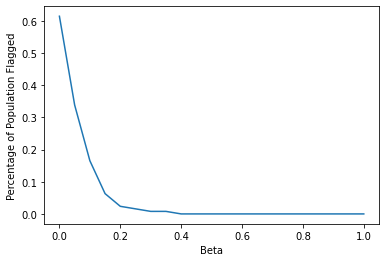

In [20]:
test_rain_gdf = gdf_rain_combined.copy()

plot_beta_vs_population_flagged(test_rain_gdf, min_beta = 0, max_beta = 1, step_beta = 0.05, type_of_data = "Rainfall")